In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import openpyxl
import seaborn as sns

import os, sys

%matplotlib inline

In [2]:
from box import Box
import glob

In [3]:
TOP = os.getcwd().replace("notebooks/tt", "")
D1 = TOP + 'data/'
figures_dir = TOP + 'manuscript/figures/'

In [4]:
file_list = glob.glob(D1 + "/*140823*.xlsx") # Include slash or it will search in the wrong directory!!


In [5]:
file_list.pop(-2)

'/home/grace/Documents/python/ml-tox/data/unbalanced_all_140823.xlsx'

In [6]:
file_list

['/home/grace/Documents/python/ml-tox/data/NM_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/CNN_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/ENN_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/TK_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/SMOTE_over_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/random_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/liver_unbalanced_all_140823.xlsx']

In [7]:
mylst = []
for f in file_list:
    mylst.append(pd.read_excel(f))

In [8]:
df = pd.concat(mylst)

In [9]:
df

,Unnamed: 0,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,balance,sampling
0,0,chr_liver,ANN1,0.000,0.000,0.000,0.000,1.000,0.000,0.352,0.006,0.000,0.000,mrgn,NM,under
1,1,chr_liver,GenRA,0.125,0.072,0.072,0.041,0.906,0.091,0.365,0.032,0.514,0.360,mrgn,NM,under
2,2,chr_liver,Gradient Boosting,0.290,0.048,0.186,0.035,0.828,0.038,0.412,0.028,0.664,0.059,mrgn,NM,under
3,3,chr_liver,KNN,0.411,0.133,0.322,0.146,0.633,0.163,0.431,0.084,0.618,0.104,mrgn,NM,under
4,4,chr_liver,LR,0.164,0.101,0.102,0.066,0.812,0.115,0.352,0.049,0.477,0.205,mrgn,NM,under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,11,dev_liver,KNN,0.076,0.105,0.044,0.061,0.991,0.012,0.836,0.009,0.300,0.447,cba,unbalanced,unbalanced
76,12,dev_liver,LR,0.106,0.148,0.069,0.101,0.977,0.032,0.828,0.034,0.300,0.447,cba,unbalanced,unbalanced
77,13,dev_liver,NB,0.000,0.000,0.000,0.000,0.991,0.020,0.828,0.014,0.000,0.000,cba,unbalanced,unbalanced
78,14,dev_liver,Random Forest,0.000,0.000,0.000,0.000,0.991,0.013,0.828,0.018,0.000,0.000,cba,unbalanced,unbalanced


In [10]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
df

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,balance,sampling
0,chr_liver,ANN1,0.000,0.000,0.000,0.000,1.000,0.000,0.352,0.006,0.000,0.000,mrgn,NM,under
1,chr_liver,GenRA,0.125,0.072,0.072,0.041,0.906,0.091,0.365,0.032,0.514,0.360,mrgn,NM,under
2,chr_liver,Gradient Boosting,0.290,0.048,0.186,0.035,0.828,0.038,0.412,0.028,0.664,0.059,mrgn,NM,under
3,chr_liver,KNN,0.411,0.133,0.322,0.146,0.633,0.163,0.431,0.084,0.618,0.104,mrgn,NM,under
4,chr_liver,LR,0.164,0.101,0.102,0.066,0.812,0.115,0.352,0.049,0.477,0.205,mrgn,NM,under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,dev_liver,KNN,0.076,0.105,0.044,0.061,0.991,0.012,0.836,0.009,0.300,0.447,cba,unbalanced,unbalanced
76,dev_liver,LR,0.106,0.148,0.069,0.101,0.977,0.032,0.828,0.034,0.300,0.447,cba,unbalanced,unbalanced
77,dev_liver,NB,0.000,0.000,0.000,0.000,0.991,0.020,0.828,0.014,0.000,0.000,cba,unbalanced,unbalanced
78,dev_liver,Random Forest,0.000,0.000,0.000,0.000,0.991,0.013,0.828,0.018,0.000,0.000,cba,unbalanced,unbalanced


In [12]:
df.balance.unique()

array(['NM', 'CNN', 'ENN', 'TK', 'SMOTE', 'random', 'unbalanced'],
      dtype=object)

In [13]:
df_melt = df.melt(id_vars = ['tox', 'classifier', 'dt', 'balance'], value_vars = ['mean_f1', 'mean_sensitivity', 'mean_specificity', 'mean_precision'], var_name = 'perf')

In [14]:
df_melt

,tox,classifier,dt,balance,perf,value
0,chr_liver,ANN1,mrgn,NM,mean_f1,0.000
1,chr_liver,GenRA,mrgn,NM,mean_f1,0.125
2,chr_liver,Gradient Boosting,mrgn,NM,mean_f1,0.290
3,chr_liver,KNN,mrgn,NM,mean_f1,0.411
4,chr_liver,LR,mrgn,NM,mean_f1,0.164
...,...,...,...,...,...,...
2235,dev_liver,KNN,cba,unbalanced,mean_precision,0.300
2236,dev_liver,LR,cba,unbalanced,mean_precision,0.300
2237,dev_liver,NB,cba,unbalanced,mean_precision,0.000
2238,dev_liver,Random Forest,cba,unbalanced,mean_precision,0.000


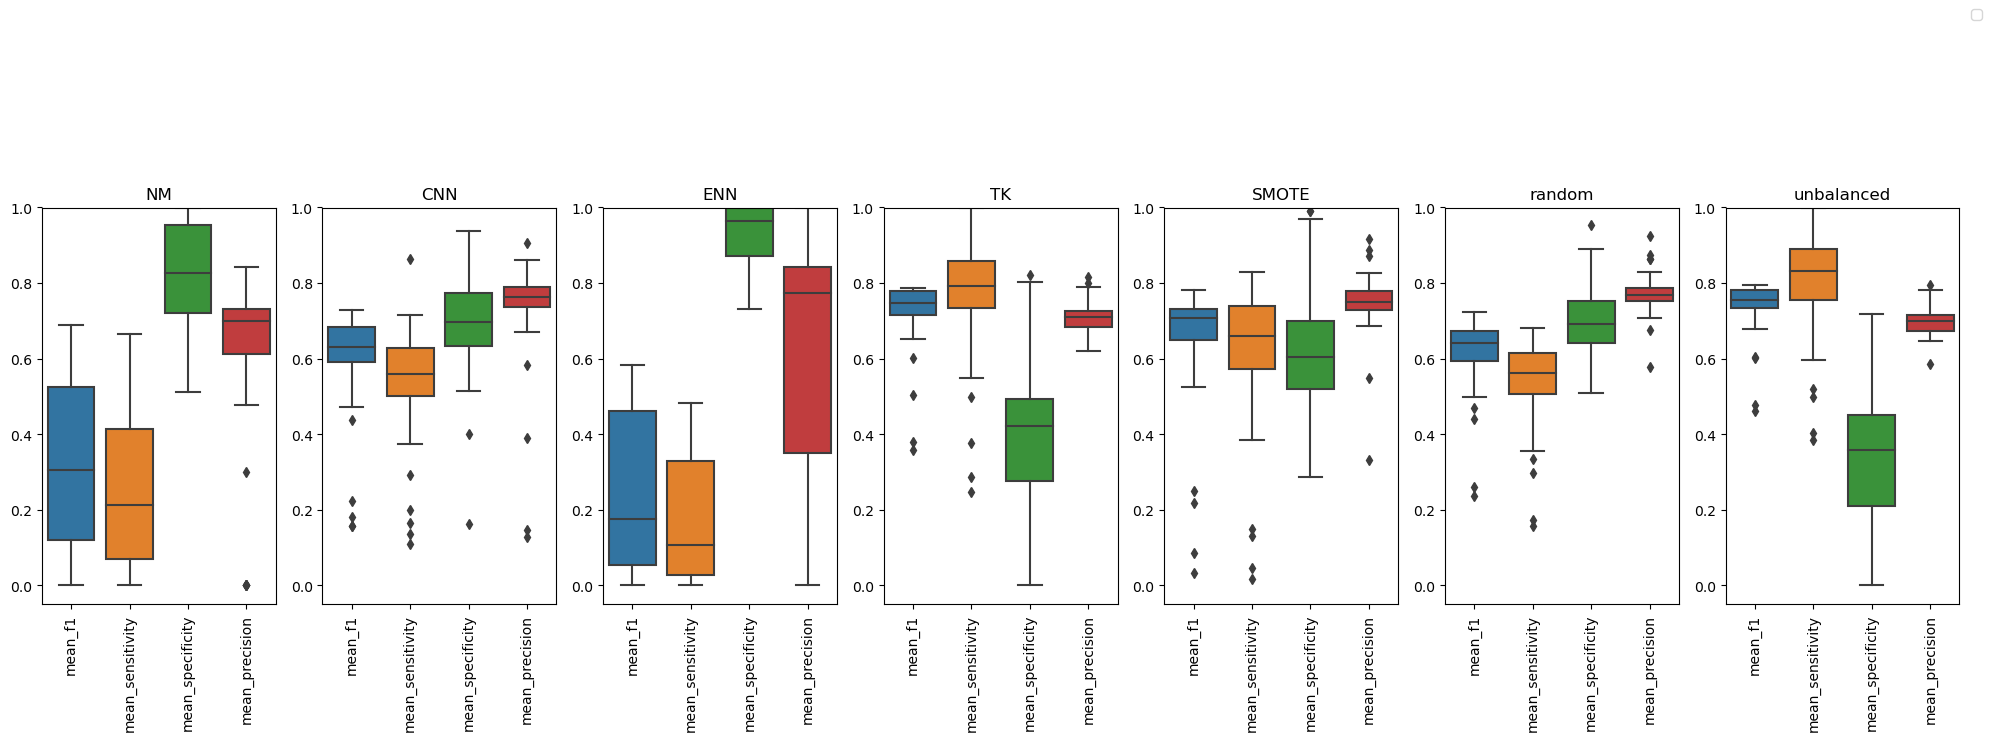

In [15]:

f = plt.figure(figsize = (20,9))
k=0
for e in df.balance.unique():
    k+=1
    ax = plt.subplot(1, 7, k)
    g = sns.boxplot(x = 'perf', y = 'value',  data = df_melt[(df_melt['balance'] == e) & (df_melt['tox'] == 'chr_liver') ])
    ax.set_title(e)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    #ax.get_legend().remove()
    plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.tight_layout()
#f.savefig(figures_dir+'FigureS2.png', dpi = 300)

In [16]:
strategies = df.balance.unique().tolist()+df.balance.unique().tolist()

In [17]:
toxs = ['chr_liver']*7 + ['dev_liver']*7

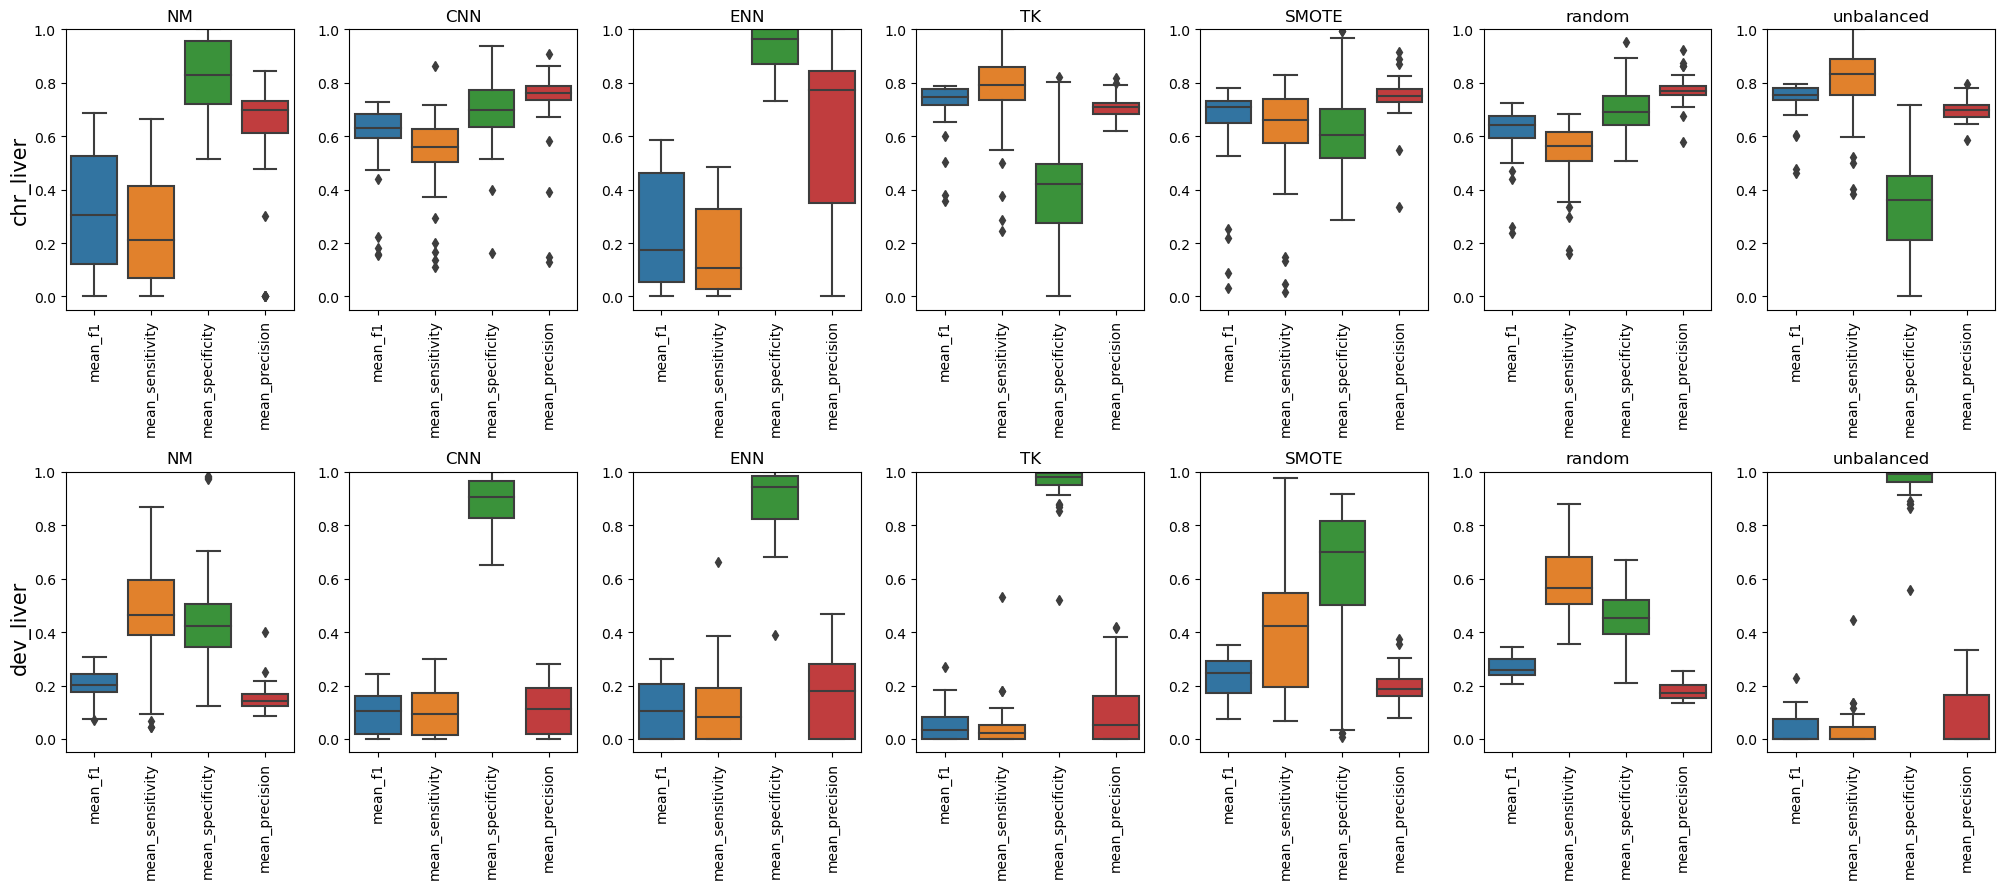

In [18]:

fig = plt.figure(figsize = (20,9))

for c,e, num in zip(strategies, toxs, range(1,16)):
    df0=df_melt[(df_melt['balance'] == c) & (df_melt['tox'] == e)]
    ax = fig.add_subplot(2,7,num)
    ax.set_ylabel('test' )
    sns.boxplot(x = 'perf', y = 'value',  data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    #ax.get_legend().remove()
    
#handles, labels = ax.get_legend_handles_labels()
#l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
    #plt.subplots_adjust(hspace = 0.8)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()
fig.savefig(figures_dir+'Figure3.png', dpi = 300)

In [19]:
df_melt

,tox,classifier,dt,balance,perf,value
0,chr_liver,ANN1,mrgn,NM,mean_f1,0.000
1,chr_liver,GenRA,mrgn,NM,mean_f1,0.125
2,chr_liver,Gradient Boosting,mrgn,NM,mean_f1,0.290
3,chr_liver,KNN,mrgn,NM,mean_f1,0.411
4,chr_liver,LR,mrgn,NM,mean_f1,0.164
...,...,...,...,...,...,...
2235,dev_liver,KNN,cba,unbalanced,mean_precision,0.300
2236,dev_liver,LR,cba,unbalanced,mean_precision,0.300
2237,dev_liver,NB,cba,unbalanced,mean_precision,0.000
2238,dev_liver,Random Forest,cba,unbalanced,mean_precision,0.000


In [20]:
df_melt.groupby(['tox', 'balance', 'perf']).agg(np.mean)

value
tox       balance    perf                      
chr_liver CNN        mean_f1           0.589125
                     mean_precision    0.727950
                     mean_sensitivity  0.528025
                     mean_specificity  0.691100
          ENN        mean_f1           0.245500
                     mean_precision    0.625950
                     mean_sensitivity  0.174350
                     mean_specificity  0.922675
          NM         mean_f1           0.317225
                     mean_precision    0.598825
                     mean_sensitivity  0.244825
                     mean_specificity  0.823075
          SMOTE      mean_f1           0.639725
                     mean_precision    0.748150
                     mean_sensitivity  0.607350
                     mean_specificity  0.625700
          TK         mean_f1           0.718700
                     mean_precision    0.707925
                     mean_sensitivity  0.767300
                     mean_specificity  0.395600
          random     mean_f1           0.612750
                     mean_precision    0.772250
                     mean_sensitivity  0.531850
                     mean_specificity  0.705025
          unbalanced mean_f1           0.735175
                     mean_precision    0.696600
                     mean_sensitivity  0.806250
                     mean_specificity  0.337250
dev_liver CNN        mean_f1           0.097175
                     mean_precision    0.116900
                     mean_sensitivity  0.101525
                     mean_specificity  0.890950
          ENN        mean_f1           0.119925
                     mean_precision    0.171325
                     mean_sensitivity  0.134325
                     mean_specificity  0.897350
          NM         mean_f1           0.205200
                     mean_precision    0.152775
                     mean_sensitivity  0.466025
                     mean_specificity  0.459475
          SMOTE      mean_f1           0.233675
                     mean_precision    0.197250
                     mean_sensitivity  0.426500
                     mean_specificity  0.633875
          TK         mean_f1           0.053050
                     mean_precision    0.095450
                     mean_sensitivity  0.048725
                     mean_specificity  0.955250
          random     mean_f1           0.267475
                     mean_precision    0.178200
                     mean_sensitivity  0.590975
                     mean_specificity  0.456575
          unbalanced mean_f1           0.039975
                     mean_precision    0.080750
                     mean_sensitivity  0.036400
                     mean_specificity  0.960525

In [21]:
df_melt1 = df.melt(id_vars = ['tox', 'classifier', 'dt', 'sampling'], value_vars = ['mean_f1', 'mean_sensitivity', 'mean_specificity', 'mean_precision'], var_name = 'perf')

In [22]:
df_melt1.groupby(['tox', 'sampling']).size()

tox        sampling  
chr_liver  over          160
           unbalanced    160
           under         800
dev_liver  over          160
           unbalanced    160
           under         800
dtype: int64

In [23]:
toxs1 = ['chr_liver']*3+['dev_liver']*3
sts = ['over', 'unbalanced', 'under']*2

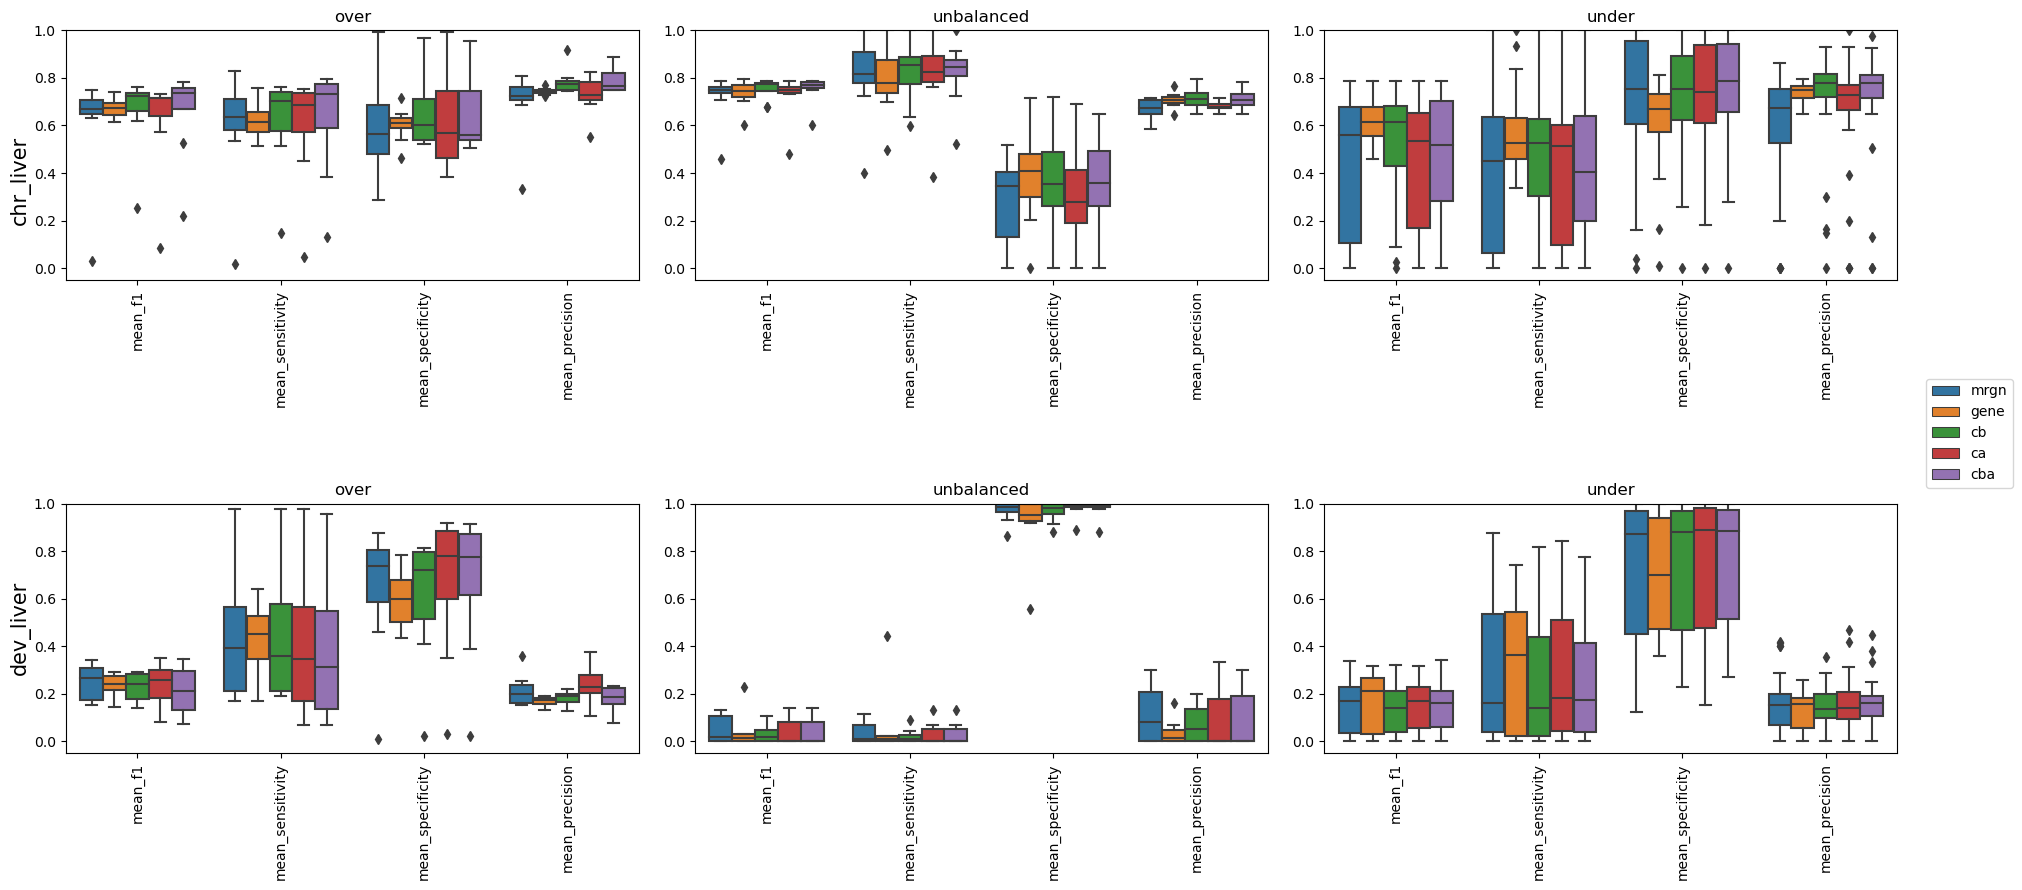

In [24]:
fig = plt.figure(figsize = (20,9))

for c,e, num in zip(sts, toxs1, range(1,7)):
    df0=df_melt1[(df_melt1['sampling'] == c) & (df_melt1['tox'] == e)]
    ax = fig.add_subplot(2,3,num)
    sns.boxplot(x = 'perf', y = 'value', hue = 'dt', data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()
fig.savefig(figures_dir+'Figure4.png', dpi = 300)